# Curate sets of PARP activity and selectivity data from ChEMBL, GoStar and UCSF

In [3]:
import importlib as imp
import pdb

import os
import sys
sys.path.append(f"{os.environ['HOME']}/git/data_science/code")
import numpy as np
import pandas as pd

import PARP.curate_parp_data as cpd
import PARP.curate_gostar_parp_dsets as cgpd

from atomsci.ddm.utils.curate_data import freq_table, aggregate_assay_data

from atomsci.ddm.utils.rdkit_easy import setup_notebook
import atomsci.ddm.utils.data_curation_functions as dcf

import logging
logging.basicConfig(format='%(asctime)-15s %(message)s')
logger = logging.getLogger('ATOM')
logger.setLevel(logging.INFO)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
matplotlib.rc('axes', labelsize=12)

%matplotlib inline

In [4]:
setup_notebook()

Loading BokehJS ...

## Process raw activity data from ChEMBL and GoStar

In [26]:
imp.reload(cpd)
chembl_parp1_df = cpd.get_raw_chembl_parp_activity_data('PARP1', 'IC50', force_update=False)
chembl_parp2_df = cpd.get_raw_chembl_parp_activity_data('PARP2', 'IC50', force_update=False)

In [27]:
imp.reload(cpd)
gostar_parp1_df = cpd.get_raw_gostar_parp_activity_data('PARP1', 'IC50', db_version='2022-06-20')
gostar_parp2_df = cpd.get_raw_gostar_parp_activity_data('PARP2', 'IC50', db_version='2022-06-20')

[15:38:06] Explicit valence for atom # 18 N, 4, is greater than permitted
[15:38:06] Explicit valence for atom # 18 N, 4, is greater than permitted
[15:38:06] Explicit valence for atom # 27 N, 4, is greater than permitted
[15:38:07] Explicit valence for atom # 14 N, 4, is greater than permitted
[15:38:07] Explicit valence for atom # 4 N, 4, is greater than permitted
[15:38:08] Explicit valence for atom # 4 O, 3, is greater than permitted
[15:38:08] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:08] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[15:38:08] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:08] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c

GoStar IC50 data for PARP1 has 12875 rows, 9897 compounds
Wrote PARP1 pIC50 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_IC50_gostar_2022-06-20.csv


[15:38:09] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:09] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[15:38:10] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:10] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'


GoStar IC50 data for PARP2 has 1352 rows, 1016 compounds
Wrote PARP2 pIC50 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_IC50_gostar_2022-06-20.csv


## Check latest GoStar release for relevant new data

In [5]:
imp.reload(cpd)
cpd.compare_gostar_activities_between_versions('PARP1', old_db_version='2022-05-06', new_db_version='2022-06-20')
cpd.compare_gostar_activities_between_versions('PARP2', old_db_version='2022-05-06', new_db_version='2022-06-20')

[15:38:14] Explicit valence for atom # 18 N, 4, is greater than permitted
[15:38:14] Explicit valence for atom # 18 N, 4, is greater than permitted
[15:38:14] Explicit valence for atom # 27 N, 4, is greater than permitted
[15:38:15] Explicit valence for atom # 14 N, 4, is greater than permitted
[15:38:15] Explicit valence for atom # 4 N, 4, is greater than permitted
[15:38:16] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:16] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[15:38:16] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:16] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[15:38:16] Explic

GoStar IC50 data for PARP1 has 12773 rows, 9873 compounds
Wrote PARP1 pIC50 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_IC50_gostar_2022-05-06.csv


[15:38:18] Explicit valence for atom # 18 N, 4, is greater than permitted
[15:38:18] Explicit valence for atom # 18 N, 4, is greater than permitted
[15:38:18] Explicit valence for atom # 27 N, 4, is greater than permitted
[15:38:19] Explicit valence for atom # 14 N, 4, is greater than permitted
[15:38:19] Explicit valence for atom # 4 N, 4, is greater than permitted
[15:38:20] Explicit valence for atom # 4 O, 3, is greater than permitted
[15:38:20] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:20] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[15:38:20] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:20] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c

GoStar IC50 data for PARP1 has 12875 rows, 9897 compounds
Wrote PARP1 pIC50 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_IC50_gostar_2022-06-20.csv
1 IC50 records were dropped for PARP1
103 IC50 records were added for PARP1 with 24 new compounds
Wrote new IC50 records to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_new_IC50_records_gostar_2022-06-20.csv


[15:38:22] Explicit valence for atom # 18 N, 4, is greater than permitted
[15:38:23] Explicit valence for atom # 18 N, 4, is greater than permitted
[15:38:23] Explicit valence for atom # 27 N, 4, is greater than permitted
[15:38:23] Explicit valence for atom # 14 N, 4, is greater than permitted
[15:38:23] Explicit valence for atom # 4 N, 4, is greater than permitted
[15:38:24] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:24] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[15:38:24] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:24] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[15:38:25] Explic

GoStar Ki data for PARP1 has 3648 rows, 1665 compounds
Wrote PARP1 pKi data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_Ki_gostar_2022-05-06.csv


[15:38:27] Explicit valence for atom # 18 N, 4, is greater than permitted
[15:38:27] Explicit valence for atom # 18 N, 4, is greater than permitted
[15:38:27] Explicit valence for atom # 27 N, 4, is greater than permitted
[15:38:28] Explicit valence for atom # 14 N, 4, is greater than permitted
[15:38:28] Explicit valence for atom # 4 N, 4, is greater than permitted
[15:38:28] Explicit valence for atom # 4 O, 3, is greater than permitted
[15:38:28] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:29] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[15:38:29] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:29] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c

GoStar Ki data for PARP1 has 3648 rows, 1665 compounds
Wrote PARP1 pKi data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_Ki_gostar_2022-06-20.csv


[15:38:30] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:30] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[15:38:30] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:30] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'


GoStar IC50 data for PARP2 has 1287 rows, 1009 compounds
Wrote PARP2 pIC50 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_IC50_gostar_2022-05-06.csv


[15:38:31] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:31] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[15:38:31] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:31] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'


GoStar IC50 data for PARP2 has 1352 rows, 1016 compounds
Wrote PARP2 pIC50 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_IC50_gostar_2022-06-20.csv
1 IC50 records were dropped for PARP2
66 IC50 records were added for PARP2 with 7 new compounds
Wrote new IC50 records to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_new_IC50_records_gostar_2022-06-20.csv


[15:38:31] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:31] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[15:38:32] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:32] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'


GoStar Ki data for PARP2 has 40 rows, 28 compounds
Wrote PARP2 pKi data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_Ki_gostar_2022-05-06.csv


[15:38:32] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:32] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[15:38:32] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[15:38:32] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'


GoStar Ki data for PARP2 has 40 rows, 28 compounds
Wrote PARP2 pKi data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_Ki_gostar_2022-06-20.csv


## Process custom-curated PARP data from Excelra

In [9]:
imp.reload(cpd)
custom_df = cpd.load_gostar_custom_parp_data()

Wrote raw custom GoStar PARP1 and PARP2 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1_selectivity/gostar_custom/parp1_parp2_selectivity_raw_gostar_custom_2022-06-23.csv
Wrote raw custom GoStar PARP1 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_activity_gostar_custom_2022-06-23.csv
Wrote raw custom GoStar PARP2 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_activity_gostar_custom_2022-06-23.csv


## Filter and reformat raw PARP1 and PARP2 data from UCSF

In [5]:
imp.reload(cpd)
filt_data = cpd.filter_ucsf_data()

Wrote filtered PARP1 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/ucsf/PARP1_Otava_library_pIC50_filtered.csv
Wrote curated PARP1 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/ucsf/PARP1_pIC50_filtered_UCSF_Otava_2022-06-21.csv
Wrote filtered PARP2 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/ucsf/PARP2_Otava_library_pIC50_filtered.csv
Wrote curated PARP2 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/ucsf/PARP2_pIC50_filtered_UCSF_Otava_2022-06-21.csv


## Perform first stage of filtering and curation for ChEMBL and GoStar data, to produce files in (almost) the same format for both databases

In [28]:
imp.reload(cpd)
chembl_parp1_filt_df = cpd.curate_parp_activity_data(chembl_parp1_df, target='PARP1', activity_type='IC50', db='chembl', db_version='30')
chembl_parp2_filt_df = cpd.curate_parp_activity_data(chembl_parp2_df, target='PARP2', activity_type='IC50', db='chembl', db_version='30')

gostar_parp1_filt_df = cpd.curate_parp_activity_data(gostar_parp1_df, target='PARP1', activity_type='IC50', db='gostar', db_version='2022-06-20')
gostar_parp2_filt_df = cpd.curate_parp_activity_data(gostar_parp2_df, target='PARP2', activity_type='IC50', db='gostar', db_version='2022-06-20')

Wrote excluded chembl data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/chembl/PARP1_pIC50_excluded_chembl_30.csv
Wrote filtered chembl data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/chembl/PARP1_pIC50_filtered_chembl_30.csv
Wrote excluded chembl data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/chembl/PARP2_pIC50_excluded_chembl_30.csv
Wrote filtered chembl data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/chembl/PARP2_pIC50_filtered_chembl_30.csv
Wrote excluded gostar data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_pIC50_excluded_gostar_2022-06-20.csv
Wrote filtered gostar data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_pIC50_filtered_gostar_2022-06-20.csv
Wrote excluded gostar data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_pIC50_excluded_gostar_2022-06-20.csv
Wrote filtered gostar data to /usr/workspace/

In [18]:
gostar_custom_parp1_filt_df = cpd.curate_parp_activity_data(target='PARP1', activity_type='IC50', db='gostar', db_version='custom_2022-06-23')
gostar_custom_parp2_filt_df = cpd.curate_parp_activity_data(target='PARP2', activity_type='IC50', db='gostar', db_version='custom_2022-06-23')

GoStar IC50 data for PARP1 has 166 rows, 135 compounds
Wrote PARP1 pIC50 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_IC50_gostar_custom_2022-06-23.csv
Wrote excluded gostar data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_pIC50_excluded_gostar_custom_2022-06-23.csv
Wrote filtered gostar data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_pIC50_filtered_gostar_custom_2022-06-23.csv
GoStar IC50 data for PARP2 has 129 rows, 114 compounds
Wrote PARP2 pIC50 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_IC50_gostar_custom_2022-06-23.csv
Wrote excluded gostar data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_pIC50_excluded_gostar_custom_2022-06-23.csv
Wrote filtered gostar data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_pIC50_filtered_gostar_custom_2022-06-23.csv


## Check to see if there are particular references that are overrepresented among the excluded records

In [8]:
gostar_parp1_excl_df = pd.read_csv('/usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_pIC50_excluded_gostar_2022-05-06.csv')
freq_table(gostar_parp1_excl_df, 'reference').head(20)

,reference,Count
28,WO 2008/114023 A2,208
30,WO 2011/006803 A1,96
29,WO 2011/002520 A2,54
38,WO 2019/169156 A1,48
23,US 20110218193 A1,47
21,US 20090042881 A1,36
13,"J Med Chem, 2018, 61 (12), 5367-5379",35
2,"Bioorg Med Chem Lett, 2012, 22 (1), 222-224",27
9,"J Med Chem, 2015, 58 (17), 6875-6898",25
24,US 20110230492 A1,20


## Find references that both ChEMBL and GoStar extracted data from. Find discrepancies between the ChEMBL and GoStar versions of the data.

In [24]:
imp.reload(cpd)
cpd.find_chembl_gostar_activity_discrepancies('PARP1', 'IC50', gostar_version='2022-06-20', chembl_version='30')
cpd.find_chembl_gostar_activity_discrepancies('PARP2', 'IC50', gostar_version='2022-06-20', chembl_version='30')

Wrote data from references common to GoStar and ChEMBL to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/PARP1_gostar_2022-06-20_chembl_30_common_ref_IC50_data.csv
Wrote data discrepancies between GoStar and ChEMBL to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/PARP1_gostar_2022-06-20_chembl_30_IC50_discrepancies.csv
... and to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/PARP1_gostar_2022-06-20_chembl_30_IC50_discrepancy_resolution.csv
Wrote data from references common to GoStar and ChEMBL to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/PARP2_gostar_2022-06-20_chembl_30_common_ref_IC50_data.csv
Wrote data discrepancies between GoStar and ChEMBL to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/PARP2_gostar_2022-06-20_chembl_30_IC50_discrepancies.csv
... and to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/PARP2_gostar_2022-06-20_chembl_30_IC50_discrepancy_resolution.csv


## Combine the ChEMBL, GoStar and UCSF data for each target, using manually annotated resolution files to resolve discrepancies between data extracted from the same references

In [29]:
imp.reload(cpd)
parp1_comb_df = cpd.combine_parp_activity_data('PARP1', 'IC50', gostar_version='2022-06-20', chembl_version='30', gostar_custom_version='2022-06-23')
parp2_comb_df = cpd.combine_parp_activity_data('PARP2', 'IC50', gostar_version='2022-06-20', chembl_version='30', gostar_custom_version='2022-06-23')

Combined ChEMBL and GoStar IC50 data for PARP1 has 12632 records, 9431 unique compounds.
Wrote combined PARP1 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/PARP1_gostar_2022-06-20_chembl_30_gostar_custom_2022-06-23_UCSF_pIC50_combined.csv
Combined ChEMBL and GoStar IC50 data for PARP2 has 1704 records, 1255 unique compounds.
Wrote combined PARP2 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/PARP2_gostar_2022-06-20_chembl_30_gostar_custom_2022-06-23_UCSF_pIC50_combined.csv


## Remove outlier replicates and average the remaining ones to create final aggregated datasets

In [30]:
imp.reload(cpd)
parp1_agg_df = cpd.average_combined_parp_activity_data(parp1_comb_df, 'PARP1', 'pIC50')
parp2_agg_df = cpd.average_combined_parp_activity_data(parp2_comb_df, 'PARP2', 'pIC50')

Removed 108 activity_value replicate measurements that were > 1.0 from median
Wrote PARP1 pIC50 outliers to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/PARP1_gostar_2022-06-20_chembl_30_gostar_custom_2022-06-23_UCSF_pIC50_outlier_cmpds.csv
Wrote aggregated PARP1 pIC50 values to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/PARP1_gostar_2022-06-20_chembl_30_gostar_custom_2022-06-23_UCSF_pIC50_agg.csv
Removed 32 activity_value replicate measurements that were > 1.0 from median
Wrote PARP2 pIC50 outliers to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/PARP2_gostar_2022-06-20_chembl_30_gostar_custom_2022-06-23_UCSF_pIC50_outlier_cmpds.csv
Wrote aggregated PARP2 pIC50 values to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/PARP2_gostar_2022-06-20_chembl_30_gostar_custom_2022-06-23_UCSF_pIC50_agg.csv


## Find references that are overrepresented in the outlier sets

In [31]:
parp1_outlier_cmpd_df = pd.read_csv('/usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/PARP1_gostar_2022-06-20_chembl_30_gostar_custom_2022-06-23_UCSF_pIC50_outlier_cmpds.csv')
parp2_outlier_cmpd_df = pd.read_csv('/usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/PARP2_gostar_2022-06-20_chembl_30_gostar_custom_2022-06-23_UCSF_pIC50_outlier_cmpds.csv')

In [32]:
parp1_outlier_df = parp1_outlier_cmpd_df[parp1_outlier_cmpd_df.outlier == 1]
parp2_outlier_df = parp2_outlier_cmpd_df[parp2_outlier_cmpd_df.outlier == 1]

In [33]:
freq_table(parp1_outlier_df, 'reference', min_freq=2).head(10)

,reference,Count
19,"Curr Med Chem, 2003, 10 (4), 321-340",11
30,"J Med Chem, 2010, 53 (12), 4561-4584",5
3,"Bioorg Med Chem Lett, 2008, 18 (14), 3942-3945",4
4,"Bioorg Med Chem Lett, 2010, 20 (3), 1100-1105",4
61,WO 2007/138351 A2,4
49,US 20150018542 A1,3
50,US 20160108020 A1,3
60,WO 2006/067472 A1,3
25,"Eur J Med Chem, 2018, 145 (), 389-403",2
54,WO 01/90077 A1,2


In [34]:
freq_table(parp2_outlier_df, 'reference', min_freq=2).head(10)

,reference,Count
10,"J Med Chem, 2021, 64 (19), 14498-14512",9
14,US-9328111-B2,6
8,"J Med Chem, 2017, 60 (4), 1262-1271",2


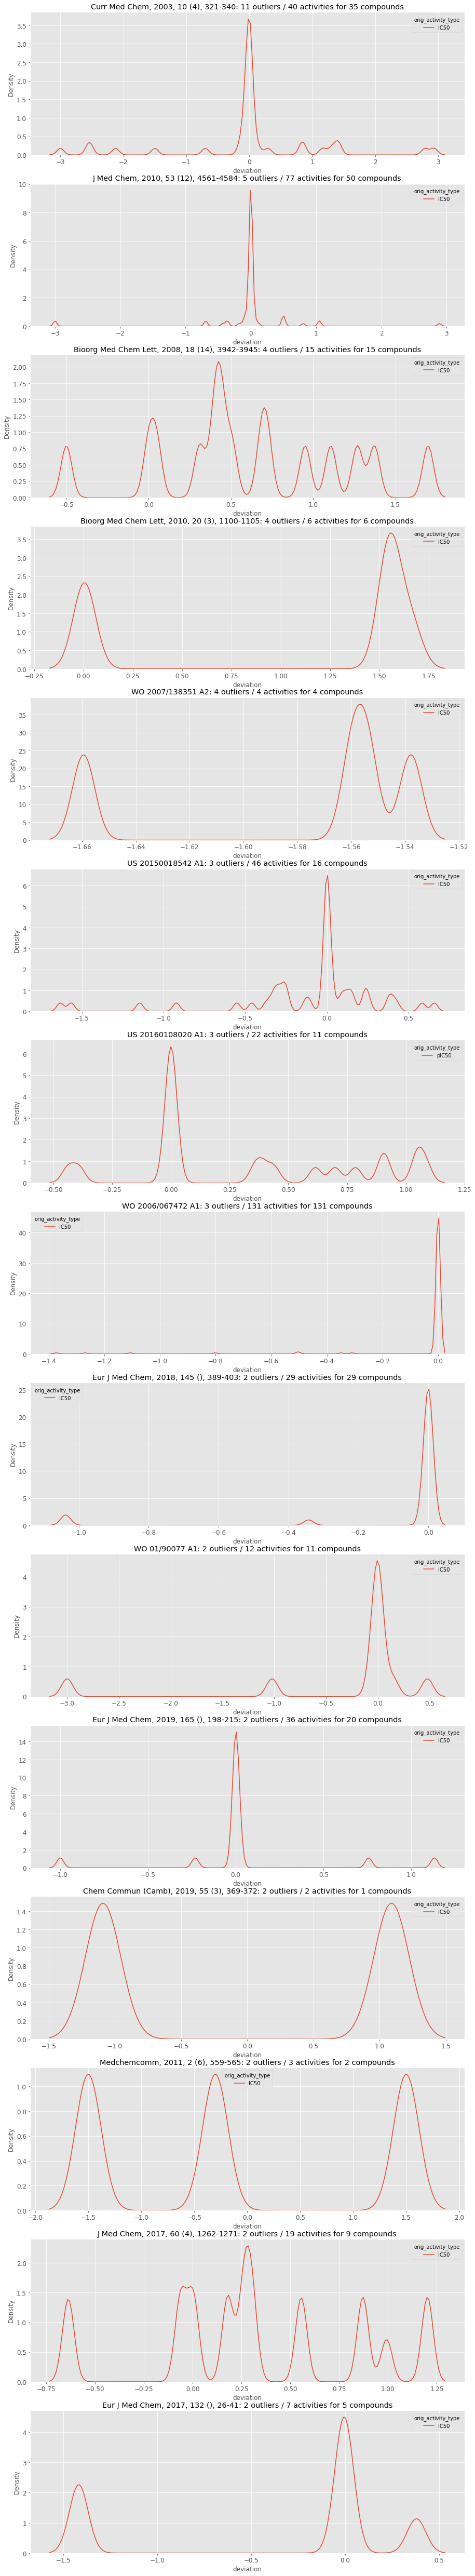

In [35]:
imp.reload(cpd)
cpd.analyze_outliers_by_reference('PARP1', nbad=2)

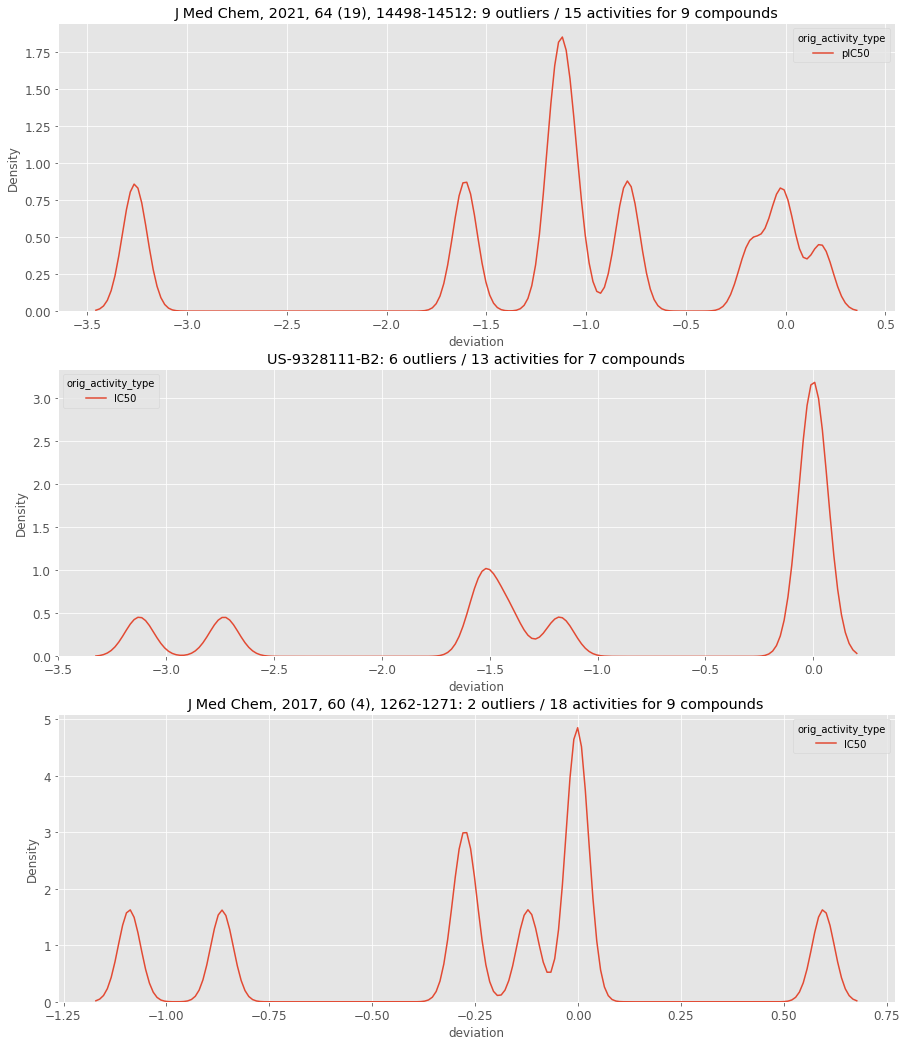

In [37]:
imp.reload(cpd)
cpd.analyze_outliers_by_reference('PARP2', nbad=2)

Wrote all activities for compounds in J Med Chem, 2021, 64 (19), 14498-14512 to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/PARP2_gostar_reference_2142417_compound_activities.csv


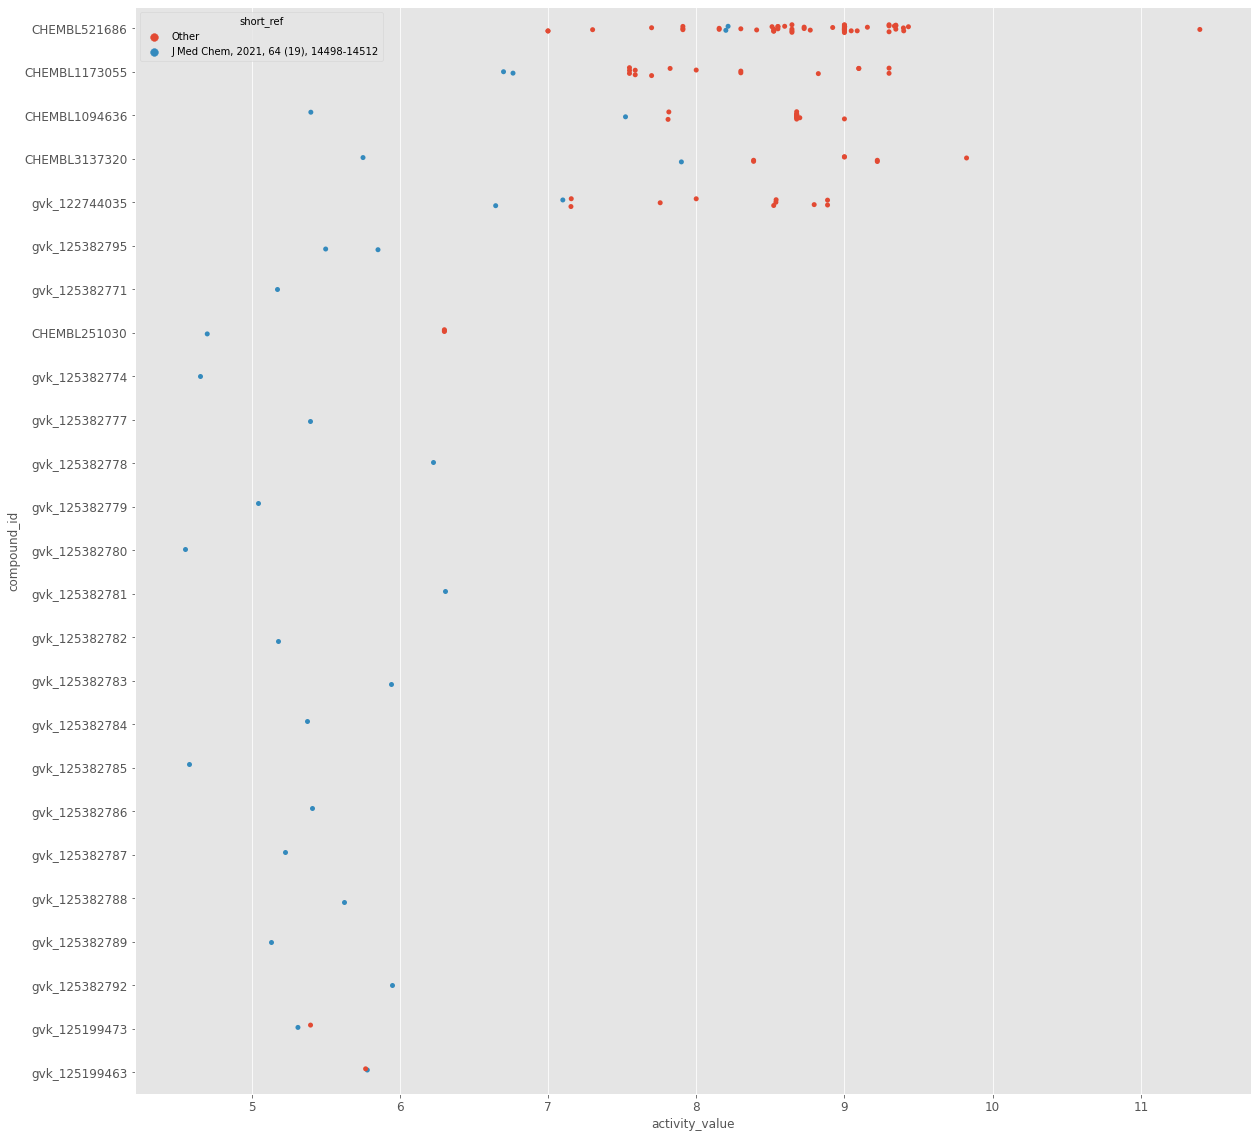

In [40]:
imp.reload(cpd)
act_df = cpd.reference_outlier_details('J Med Chem, 2021, 64 (19), 14498-14512', target='PARP2')

## Really old code follows

## Examine each GoStar target inhibition dataset and look for anomalies

In [14]:
imp.reload(cgpd)
cgpd.check_gostar_inhib_dset('PARP1', 'IC50')

Reading /usr/workspace/atom/gostar/raw/210930/results/PARP1_human_IC50_2021_09_30.csv
Actiity unit frequencies:
  activity_uom  Count
3           uM   3803
2           nM   1648
1         NULL     58
0            M     48
58 records with no activity units
	Assay description frequencies for unitless records:
                                   enzyme_cell_assay  Count
1  Negative logarithm of inhibitory concentration...     41
0  Inhibitory concentration of compound against r...     17

	Reference frequencies for unitless records:
         reference  Count
0  WO 03/103666 A2     41
1   WO 99/11624 A1     17




References providing most data:


RDKit ERROR: [22:04:53] Explicit valence for atom # 27 N, 4, is greater than permitted
[22:04:53] Explicit valence for atom # 27 N, 4, is greater than permitted
RDKit ERROR: [22:04:53] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [22:04:53] Explicit valence for atom # 4 N, 4, is greater than permitted
[22:04:53] Explicit valence for atom # 14 N, 4, is greater than permitted
[22:04:53] Explicit valence for atom # 4 N, 4, is greater than permitted


Filtered GoStar set has 4415 unique SMILES
Public set has 2818 unique SMILES
GoStar set has 3295 new SMILES not in public set


,ref_id,reference,enzyme_cell_assay,Count
0,2008599,US 20050059663 A1,"Inhibitory concentration of the compound (dissolved in DMSO) against Poly (ADP-Ribose) Polymerase from HELA cells upon incubation in 25 mM HEPES, pH 7.4 for 10 min at 30 degree C",327
1,143643,WO 2005/097750 A1,"Inhibitory concentration of the compound against purified recombinant human poly(ADP-ribose) polymerase using radio labeled NAD, 100 ug/mL calf thymus DNA, 100 ug/mL histones upon incubation in 100 mM Tris, pH 8.0, 10 mM MgCl2, 1 mM DTT, 200 uM NAD for 10 min at 37 degree C",171
2,,,"Inhibitory concentration of the compound against purified recombinant human poly(ADP-ribose) polymerase using tritium-labeled NAD as radioligand, 0.1 mg/mL DNA, 0.1 mg/mL histones upon incubation in 50 mM Tris, pH 8.0, 5 mM MgCl2, 1 mM DTT, 200 uM NAD for 1 h at RT",95
3,137078,WO 2007/149451 A2,"Inhibitory activity against human PARP (5 ng) upon incubation using Histone H1 substrate (20 mg/ml) and [32P]NAD+ (100 uM) for 12 min at RT in 100 mM Tris, pH 8.0 with compound dissolved in <2.5 DMSO",247
4,142203,WO 2004/080976 A1,"Inhibitory concentration of the compound (dissolved in 1 DMSO) against human poly (ADP-ribose) polymerase isolated from HeLa cells upon incubation in Z-buffer forpH 7.4, for 45 min at 30 degree C determined by scintillation counting",212
5,142210,WO 2008/114023 A2,Inhibitory concentration of compound [dissolved in 1% DMSO] against human poly (ADP-ribose) polymerase upon incubation in Z-buffer (25 mM Hepes; 12.5 mM MgCl2; 50 mM KCl; 1 mM DTT; 10 Glycerol; 0.001 NP-40) pH 7.4 at 30 degree C for 45 min,208
6,,,"Inhibitory concentration of the compound against human poly(ADP-ribose)polymerase (12.5 uM) activity using 800 uM NAD and 50 uM of biotinylated NAD as substrates upon incubation in PARP buffer (50 mM Tris hydrochloric acid buffer, pH 8.0, 25 mM MgCl2) in the presence of histone protein, denatured DNA for 30 min at RT; IC50 is ~1 nM to 1 uM",180
7,143613,WO 2004/043959 A1,"Inhibitory concentration of the compound against human poly(ADP-ribose)polymerase (12.5 uM) activity using 800 uM NAD and 50 uM of biotinylated NAD as substrates upon incubation in PARP buffer (50 mM Tris hydrochloric acid buffer, pH 8.0, 25 mM MgCl2) in the presence of histone protein, denatured DNA for 30 min at RT",8
8,142205,WO 2006/067472 A1,"Inhibitory concentration of the compound dissolved in 1 DMSO against mammalian poly (ADP-ribose)polymerase isolated from human Hela cells upon incubation in Z-buffer (25mM Hepes, 12.5 mM MgCl2, 50mM KCl, 1 mM DTT, 10 glycerol, 0.001 NP-40, pH 7.4) at 30 degree C for 45 min using 3H-NAD",110
9,,,"Inhibitory concentration of the compound dissolved in 1 DMSO against mammalian poly (ADP-ribose)polymerase isolated from human Hela cells upon incubation in Z-buffer (25mM Hepes, 12.5 mM MgCl2, 50mM KCl, 1 mM DTT, 10 glycerol, 0.001 NP-40, pH 7.4) at 30 degree C for 45 min using 3H-NAD; IC50 is 10 to 0.001 uM",59


In [16]:
imp.reload(cgpd)
cgpd.check_gostar_inhib_dset('PARP2', 'IC50', min_recs_per_ref=10)

Reading /usr/workspace/atom/gostar/raw/210930/results/PARP2_human_IC50_2021_09_30.csv
Actiity unit frequencies:
  activity_uom  Count
1           uM    141
0           nM    126
References providing most data:
Filtered GoStar set has 244 unique SMILES
Public set has 338 unique SMILES
GoStar set has 78 new SMILES not in public set


,ref_id,reference,enzyme_cell_assay,Count
0,2062351,WO 2013/012723 A1,Inhibitory concentration of the compound against autoparsylation of human PARP-2 in presence of 250 uM Beta NAD+ upon incubation for 60 minutes at RT was determined by liquid chromatography-Tandem mass spectrometry,62
1,2110121,"Eur. J. Med. Chem., 2018, 145 (), 389-403","In vitro inhibitory concentration of the compound against recombinant human PARP-2 using 26 uM NAD+ upon incubation in 50 mM TRIS, H 8.0 at 37 degree C for 1 hr by ELISA",34
2,2105588,"Bioorg. Med. Chem., 2017, 25 (15), 4045-4054",Inhibitory concentration of compound against human recombinant PARP-2 by ELISA method,28
3,2126409,WO 2019/222272 A1,"In vitro inhibitory concentration of compound against Human recombinant PARP2 using 20 uM histone H3 as substrate in presence of 10 uM [32P]NAD+ upon incubation in 50 mM Tris-HCL, pH 8.0 for 2 hrs at RT by HotSpot assay",25
4,2115698,WO 2018/125961 A1,"Inhibitory concentration of compound against recombinant human PARP-2 using 150 nM BIOTINYL-NAD as substrate upon incubation in 25 mM TRIS, pH 8 for 15 mins by SCINTILLATION PROXIMITY ASSAY (SPA)",17
5,2136065,WO 2020/232119 A1,"In vitro inhibitory concentration of compound against human recombinant PARP2 using 20 uM Histone H3 as substrate in presence of 10 uM [32P]NAD+ and [Adenylate-32P]NAD upon incubation in 50 mM Tris HCl buffer, pH 8.0 for 2 hrs at RT",16
6,2060726,WO 2013/008217 A1,Inhibitory concentration of compound against autoparsylation of human N-terminal GST-tagged POLY ADP-RIBOSE POLYMERASE 2 (PARP2) upon incubation at RT for 60 minutes using LIQUID CHROMATOGRAPHY-TANDEM MASS SPECTROMETRY,15
7,2104327,"Eur. J. Med. Chem., 2017, 132 (), 26-41",Inhibitory concentration of compound against human recombinant PARP-2 using ELISA method,12
8,2090791,"Bioorg. Med. Chem., 2015, 23 (4), 681-693",Inhibitory concentration of compound against Human recombinant PARP2 by ELISA,10


In [17]:
imp.reload(cgpd)
cgpd.check_gostar_inhib_dset('PARP1', 'Ki', min_recs_per_ref=10)

Reading /usr/workspace/atom/gostar/raw/210930/results/PARP1_human_Ki_2021_09_30.csv
Actiity unit frequencies:
  activity_uom  Count
0           nM   1357
1           uM      6
Filtered GoStar set has 935 unique SMILES
Public set has 1088 unique SMILES
GoStar set has 145 new SMILES not in public set


,ref_id,reference,enzyme_cell_assay,Count
0,2086545,US 20140212509 A1,"Inhibition constant of compound against Recombinant human Poly(ADP-Ribose) Polymerase 1 purified from Escherichia coli using 1.5 uM [3H]-NAD+, 200 nM biotinyl-histone H1 and 200 nM activated Calf thymus DNA as substrates upon incubation in 50 mM Tris buffer, pH 8.0 for 1 hr by SCINTILLATION COUNTER ASSAY",772
1,143671,WO 2007/084532 A2,"Inhibition constant of the compound towards recombinant human poly(ADP-Ribose)polymerase-1 upon incubation in assay buffer 50 mM Tris, pH 8.0 using 1.5 uM [3H]-NAD+ as radioligand in the presence of 200 nM biotinylated histone H1",91
2,2058891,US 20120190720 A1,"Inhibition constant of compound against recombinant human PARP purified from E. Coli using 1.5 uM [3H]NAD- and 200 nM biotinyl-histone H1 as substrates upon incubation in 50 mM TRIS buffer, pH 8.0 for 1 h",91
3,2077981,US 20080280867 A1,"Inhibition constant of compound against human recombinant PARP-1 expressed in Escherichia coli using 200 nM activated calf thymus DNA as substrate upon incubation in 50 mM TRIS-HCl, pH 8.0 in presence of 1.5 uM [3H]NAD+ and 200 nM BIOTINYLATED-HISTONE H1",91
4,2077988,US 20080293795 A1,"Inhibition constant of the compound towards human recombinant PARP (1 nM) purified from Escherichia coli upon incubation in 50 mM TRIS, pH 8.0 using 1.5 uM [3H]NAD+ as substrate in presence of 200 nM BIOTINYLATED-HISTONE H1",91
5,2086562,EP 2114948 B1,Inhibition constant of the compound towards recombinant human Poly(ADP-Ribose) Polymerase (PARP) expressed in Escherichia coli upon incubation for 60 mins at 37 degree C,88
6,146195,"J. Med. Chem., 2010, 53 (12), 4561-4584",Inhibition constant of the compound against human Poly(ADP-ribose) polymerase-1,12
7,,,Inhibition constant of the compound against human Poly(ADP-ribose) polymerase-1 in peroxide induced cytotoxicity assay was determined,1
8,2051108,WO 2010/083220 A1,"Inhibition constant of the compound towards human recombinant Poly(ADP-Ribose) Polymerase 1 expressed in Escherichia coli using 1.5 uM [3H]-NAD+ and 200 nM BIOTINYL-HISTONE H1 as substrate upon incubation in 50 mM Tris, pH 8 for 1 hour in presence of 1 mM DTT",13


## Read raw GoStar data for each target, filter by activity type and convert to pIC50 or pKi values

In [25]:
imp.reload(cpd)
imp.reload(dcf)
for target in ['PARP1', 'PARP2']:
    for act_type in ['IC50', 'Ki']:
        raw_df = cpd.get_gostar_parp_data(target=target, activity_type=act_type, db_version='2022-05-06')

[21:55:57] Explicit valence for atom # 18 N, 4, is greater than permitted
[21:55:58] Explicit valence for atom # 18 N, 4, is greater than permitted
[21:55:58] Explicit valence for atom # 27 N, 4, is greater than permitted
[21:55:58] Explicit valence for atom # 14 N, 4, is greater than permitted
[21:55:58] Explicit valence for atom # 4 N, 4, is greater than permitted
[21:55:59] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[21:55:59] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[21:55:59] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[21:55:59] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[21:56:00] Explic

GoStar IC50 data for PARP1 has 12065 rows, 9309 compounds
Wrote PARP1 pIC50 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_IC50_gostar_2022-05-06.csv


[21:56:02] Explicit valence for atom # 18 N, 4, is greater than permitted
[21:56:02] Explicit valence for atom # 18 N, 4, is greater than permitted
[21:56:02] Explicit valence for atom # 27 N, 4, is greater than permitted
[21:56:02] Explicit valence for atom # 14 N, 4, is greater than permitted
[21:56:02] Explicit valence for atom # 4 N, 4, is greater than permitted
[21:56:03] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[21:56:03] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[21:56:03] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[21:56:03] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[21:56:04] Explic

GoStar Ki data for PARP1 has 3613 rows, 1631 compounds
Wrote PARP1 pKi data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_Ki_gostar_2022-05-06.csv


[21:56:05] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[21:56:05] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[21:56:05] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[21:56:05] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'


GoStar IC50 data for PARP2 has 1049 rows, 812 compounds
Wrote PARP2 pIC50 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_IC50_gostar_2022-05-06.csv


[21:56:06] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[21:56:06] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'
[21:56:06] SMILES Parse Error: syntax error while parsing: fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1
[21:56:06] SMILES Parse Error: Failed parsing SMILES 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1' for input: 'fc1=c(c=c(cc2=nnc(=o)c3=cc=cc=c23)c=c1)c(=o)n1cc(cnc2cc2)c1'


GoStar Ki data for PARP2 has 40 rows, 28 compounds
Wrote PARP2 pKi data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_Ki_gostar_2022-05-06.csv


In [4]:
help(os.path.isfile)

Help on function isfile in module genericpath:

isfile(path)
    Test whether a path is a regular file



## Find compounds with IC50 data for both PARP1 and PARP2

In [14]:
imp.reload(cpd)
cmn_df = cpd.find_parp1_parp2_common_cmpds()

Wrote 2734 rows to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/chembl/PARP1_IC50_chembl29_with_ids.csv
Wrote 4781 rows to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_IC50_gostar_with_ids.csv
Wrote 418 rows to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/chembl/PARP2_IC50_chembl29_with_ids.csv
Wrote 263 rows to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_IC50_gostar_with_ids.csv
408 compounds with both PARP1 and PARP2 data
5798 with PARP1 data
456 with PARP2 data
Wrote /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1_PARP2_common_compounds.csv


In [15]:
cmn_df.head()

,compound_id,SMILES
159,PARP_1020,Cc1ccc(-c2cc3c(N)cccc3c(=O)[nH]2)cc1
128,PARP_1023,O=C(c1ccc(F)cc1)C1CCN(CC(=O)N(Cc2nc3c(c(=O)[nH...
400,PARP_1024,O=C(CN1CCC(C(=O)c2ccc(F)cc2)CC1)NCc1nc2c(c(=O)...
384,PARP_1025,O=C(CCc1ccccc1)N(Cc1ccsc1)Cc1nc2c(c(=O)[nH]1)C...
58,PARP_1028,O=c1[nH]c(-c2ccc(C(F)(F)F)cc2)nc2c1SCCC2


## Curate and combine PARP datasets from ChEMBL and GoStar

In [3]:
imp.reload(cpd)
imp.reload(dcf)
combined_data = cpd.combine_chembl_gostar_data()

Excluded 10 organometallic molecules from GoStar PARP1 data
Excluded 0 organometallic molecules from ChEMBL PARP1 data
Excluded 1 organometallic molecules from GoStar PARP2 data
Excluded 0 organometallic molecules from ChEMBL PARP2 data


In [4]:
parp1_df = combined_data['PARP1']

In [5]:
parp2_df = combined_data['PARP2']

In [8]:
imp.reload(cpd)
parp1_filt_df = cpd.remove_outlier_replicates(parp1_df, max_diff_from_median=0.5)
parp1_filt_df.shape, parp1_df.shape

((7299, 6), (7500, 6))

In [9]:
imp.reload(cpd)
parp2_filt_df = cpd.remove_outlier_replicates(parp2_df, max_diff_from_median=0.5)
parp2_filt_df.shape, parp2_df.shape

((594, 6), (631, 6))

In [11]:
parp1_agg_df = aggregate_assay_data(parp1_filt_df, value_col='pIC50', active_thresh=6.0, id_col='compound_id',
                                   smiles_col='base_rdkit_smiles', relation_col='relation')
parp1_agg_df.shape

0 entries in input table are missing SMILES strings
5760 unique SMILES strings are reduced to 5760 unique base SMILES strings


(5760, 5)

In [13]:
parp2_agg_df = aggregate_assay_data(parp2_filt_df, value_col='pIC50', active_thresh=6.0, id_col='compound_id',
                                   smiles_col='base_rdkit_smiles', relation_col='relation')
parp2_agg_df.shape

0 entries in input table are missing SMILES strings
399 unique SMILES strings are reduced to 399 unique base SMILES strings


(399, 5)

In [14]:
parp2_agg_df.head()

,compound_id,base_rdkit_smiles,relation,pIC50,active
0,PARP_3309,CC1(C)C(=O)N(c2ccc(C#N)c(C(F)(F)F)c2)C(=O)N1CC...,,9.000000,1
1,CHEMBL4100719,O=C(Nc1cc(Cn2c(=O)[nH]c(=O)c3ccccc32)cnc1F)[C@...,,8.387216,1
2,CHEMBL2419702,CCCN(Cc1nc2c(c(=O)[nH]1)COCC2)C(=O)CN1CCC(C(=O...,<,4.721246,0
3,CHEMBL4087554,CC(C)(C)OC(=O)N1CC[C@H](C(=O)Nc2cc(Cn3c(=O)[nH...,,7.167491,1
4,CHEMBL2431805,O=c1[nH]c(-c2ccc(C(F)(F)F)cc2)nc2c1CCSC2,,6.319832,1


In [15]:
parp1_dir = f"{cpd.dset_dir}/PARP1"
parp1_cur_file = f"{parp1_dir}/PARP1_chembl_gostar_pIC50_curated.csv"
parp1_filt_df.to_csv(parp1_cur_file, index=False)
print(f"Wrote {parp1_cur_file}")

Wrote /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/PARP1_chembl_gostar_pIC50_curated.csv


In [16]:
parp2_dir = f"{cpd.dset_dir}/PARP2"
parp2_cur_file = f"{parp2_dir}/PARP2_chembl_gostar_pIC50_curated.csv"
parp2_filt_df.to_csv(parp2_cur_file, index=False)
print(f"Wrote {parp2_cur_file}")

Wrote /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/PARP2_chembl_gostar_pIC50_curated.csv


In [17]:
parp1_agg_file = f"{parp1_dir}/PARP1_chembl_gostar_pIC50_agg.csv"
parp1_agg_df.to_csv(parp1_agg_file, index=False)
print(f"Wrote {parp1_agg_file}")

Wrote /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/PARP1_chembl_gostar_pIC50_agg.csv


In [18]:
parp2_agg_file = f"{parp2_dir}/PARP2_chembl_gostar_pIC50_agg.csv"
parp2_agg_df.to_csv(parp2_agg_file, index=False)
print(f"Wrote {parp2_agg_file}")

Wrote /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/PARP2_chembl_gostar_pIC50_agg.csv


In [16]:
sel_df = agg_data['log_selectivity']

In [17]:
sel_df.head()

,compound_id,base_rdkit_smiles,PARP1_relation,PARP1_pIC50,PARP2_relation,PARP2_pIC50,log_selectivity,log_selectivity_relation
0,Otava_1084012,O=C(NC(=S)Nc1ccc2[nH]c(O)nc2c1)c1cccc(F)c1,,5.065000,<,4.400117,0.664883,>
2,Otava_1084282,O=C(Cc1nnc(O)c2ccccc12)Nc1ccc(Cl)cc1Cl,,4.637000,<,4.400117,0.236883,>
14,Otava_1084133,Nc1cccc2c(-c3cnn(-c4ccccc4)c3)[nH]nc12,,4.326902,,4.799169,-0.472266,
15,Otava_1084017,CCOC(=O)c1c(C)oc2c(Cl)cc(NS(=O)(=O)c3ccc(C)cc3...,<,4.400117,,5.273000,-0.872883,<
17,Otava_1084094,CCOC(=O)c1c(-c2ccc(C(C)C)cc2)csc1N,,6.057000,<,4.400117,1.656883,>


In [18]:
sel_df.shape

(97, 8)

In [19]:
agg_data['PARP1'].shape

(387, 4)

In [20]:
agg_data['PARP2'].shape

(361, 4)

In [21]:
parp1_df = agg_data['PARP1']
parp2_df = agg_data['PARP2']

In [22]:
freq_table(parp1_df, 'relation')

,relation,Count
1,<,289
0,,98


In [23]:
freq_table(parp2_df, 'relation')

,relation,Count
1,<,272
0,,89


## Look at custom-curated PARP selectivity data from Excelra

In [5]:
imp.reload(cpd)
act_df = cpd.load_gostar_custom_parp_data()

Wrote raw custom GoStar PARP1 and PARP2 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1_selectivity/gostar_custom/parp1_parp2_selectivity_raw_gostar_custom_2022-06-23.csv
Wrote raw custom GoStar PARP1 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1/gostar/PARP1_activity_gostar_custom_2022-06-23.csv
Wrote raw custom GoStar PARP2 data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP2/gostar/PARP2_activity_gostar_custom_2022-06-23.csv


In [6]:
act_df.columns.values

array(['act_id', 'gvk_id', 'compound_name', 'sub_smiles',
       'activity_prefix', 'activity_value', 'activity_uom', 'assay_type',
       'cells_cellline_organ', 'enzyme_cell_assay', 'target', 'source',
       'activity_type', 'ref_id', 'reference'], dtype=object)

In [17]:
imp.reload(cpd)
sel_raw_df = cpd.get_raw_gostar_parp_selectivity_data(db_version='custom_2022-06-23')

Wrote selectivity reference stats to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1_selectivity/gostar/parp1_parp2_selectivity_ref_stats_gostar_custom_2022-06-23.csv

16 references actually have PARP1 & 2 data for the same compounds.
    154 records of PARP1 data
    144 records of PARP2 data
    118 unique SMILES in PARP1 data
    118 unique SMILES in PARP2 data
Wrote combined data for all types to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1_selectivity/gostar/parp1_parp2_selectivity_all_types_gostar_custom_2022-06-23.csv
Wrote raw converted pIC50 and pKi data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1_selectivity/gostar/parp1_parp2_selectivity_raw_gostar_custom_2022-06-23.csv


In [18]:
sel_cur_df = cpd.curate_parp_selectivity_data(sel_raw_df, db='gostar', db_version='custom_2022-06-23')

Wrote excluded gostar data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1_selectivity/gostar/parp1_parp2_selectivity_excluded_gostar_custom_2022-06-23.csv
Wrote curated gostar data to /usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1_selectivity/gostar/parp1_parp2_selectivity_curated_gostar_custom_2022-06-23.csv


In [19]:
sel_cur_df.head()

,act_id,gvk_id,compound_name,sub_smiles,activity_prefix,activity_value,activity_uom,assay_type,cells_cellline_organ,enzyme_cell_assay,target,source,activity_type,ref_id,reference,base_rdkit_smiles,relation,compound_id
0,-144,125837629,Compound_5;BYK204165,CN1C=CC=C1\C=C1/C(=O)NC(=O)C2=CC=CC=C12,=,7.35,NaN,B,NaN,Inhibitory concentration (pIC50) of compound a...,PARP1,NaN,pIC50,2151189,"J Mol Model, 2016, 22 (4), 74",Cn1cccc1/C=C1\C(=O)NC(=O)c2ccccc21,=,gvk_125837629
1,-146,125838740,Compound_BYK49187,CC1=C(N=CN1)C1CCN(CC1)C1=NC2=CC=CC3=C2N1CCC3=O,=,8.36,NaN,B,NaN,Inhibitory concentration of compound (dissolve...,PARP1,Human,pIC50,2151188,"Mol Pharmacol, 2008, 74 (6), 1587-1598",Cc1[nH]cnc1C1CCN(c2nc3cccc4c3n2CCC4=O)CC1,=,gvk_125838740
2,-147,125838741,Compound_BYK236864,O=C1CCN2C(=NC3=CC=CC1=C23)C1=CC=C(C=C1)C1=CC=C...,=,7.81,NaN,B,NaN,Inhibitory concentration of compound (dissolve...,PARP1,Human,pIC50,2151188,"Mol Pharmacol, 2008, 74 (6), 1587-1598",O=C1CCn2c(-c3ccc(-c4ccccn4)cc3)nc3cccc1c32,=,gvk_125838741
3,-148,125838742,Compound_BYK20370,CC1=C(C)N2C=C(Cl)C=C(O)C2=N1,=,6.40,NaN,B,NaN,Inhibitory concentration of compound (dissolve...,PARP1,Human,pIC50,2151188,"Mol Pharmacol, 2008, 74 (6), 1587-1598",Cc1nc2c(O)cc(Cl)cn2c1C,=,gvk_125838742
4,-149,125838743,Compound_BYK204165,CN1C=CC=C1\C=C1/C(=O)NC(=O)C2=CC=CC=C12,=,7.35,NaN,B,NaN,Inhibitory concentration of compound (dissolve...,PARP1,Human,pIC50,2151188,"Mol Pharmacol, 2008, 74 (6), 1587-1598",Cn1cccc1/C=C1\C(=O)NC(=O)c2ccccc21,=,gvk_125838743


In [21]:
prev_cur_sel_df = pd.read_csv('/usr/workspace/atom/PARP_compounds/Datasets_and_Models/PARP1_selectivity/gostar/parp1_parp2_selectivity_curated_gostar_2022-05-06.csv')

In [22]:
prev_cur_sel_df.head()

,act_id,gvk_id,compound_name,sub_smiles,mol_weight,activity_prefix,activity_value,activity_uom,assay_type,cells_cellline_organ,enzyme_cell_assay,target_id,standard_name,source,activity_type,ref_id,year,title,reference,base_rdkit_smiles,target,relation,compound_id
0,25189580,125382769,Notuss,CN1N=CN=C1[C@@H]1[C@H](NC2=CC(F)=CC3=C2C1=NNC3...,380.3509,=,7.456,NaN,B,NaN,Mean inhibitory concentration of the compound ...,10857,Poly(ADP-ribose) polymerase 1,Human,pIC50,2142417,2021.0,"Discovery of 5-{4-[(7-Ethyl-6-oxo-5,6-dihydro-...","J Med Chem, 2021, 64 (19), 14498-14512",Cn1ncnc1[C@H]1c2n[nH]c(=O)c3cc(F)cc(c23)N[C@@H...,PARP1,=,gvk_125382769
1,25189581,125382778,Notuss,CN1C(C)=CN=C1N1CCN(CC2=CC=C3C(NC(=O)C4=CC=CC=C...,387.4775,=,8.067,NaN,B,NaN,Mean inhibitory concentration of the compound ...,10857,Poly(ADP-ribose) polymerase 1,Human,pIC50,2142417,2021.0,"Discovery of 5-{4-[(7-Ethyl-6-oxo-5,6-dihydro-...","J Med Chem, 2021, 64 (19), 14498-14512",Cc1cnc(N2CCN(Cc3ccc4c(c3)[nH]c(=O)c3ccccc34)CC...,PARP1,=,gvk_125382778
2,25189582,125382773,Notuss,FC1=CC=C(C=C1)C1=CCN(CCCC2=NC3=C(C=CC=C3Cl)C(=...,397.8730,=,7.189,NaN,B,NaN,Mean inhibitory concentration of the compound ...,10857,Poly(ADP-ribose) polymerase 1,Human,pIC50,2142417,2021.0,"Discovery of 5-{4-[(7-Ethyl-6-oxo-5,6-dihydro-...","J Med Chem, 2021, 64 (19), 14498-14512",O=c1[nH]c(CCCN2CC=C(c3ccc(F)cc3)CC2)nc2c(Cl)cc...,PARP1,=,gvk_125382773
3,25189583,125382781,Notuss,CN1C(C)=CN=C1N1CCN(CC2=CC=C3C(NC(=O)C4=C3CCCC4...,391.5093,=,8.067,NaN,B,NaN,Mean inhibitory concentration of the compound ...,10857,Poly(ADP-ribose) polymerase 1,Human,pIC50,2142417,2021.0,"Discovery of 5-{4-[(7-Ethyl-6-oxo-5,6-dihydro-...","J Med Chem, 2021, 64 (19), 14498-14512",Cc1cnc(N2CCN(Cc3ccc4c5c(c(=O)[nH]c4c3)CCCC5)CC...,PARP1,=,gvk_125382781
4,25189584,125382787,Notuss,CCC1=CC2=C(NC1=O)C=C(CN1CCN(CC1)C1=NC=C(N=C1)C...,406.4808,=,7.535,NaN,B,NaN,Mean inhibitory concentration of the compound ...,10857,Poly(ADP-ribose) polymerase 1,Human,pIC50,2142417,2021.0,"Discovery of 5-{4-[(7-Ethyl-6-oxo-5,6-dihydro-...","J Med Chem, 2021, 64 (19), 14498-14512",CCc1cc2ccc(CN3CCN(c4cnc(C(=O)NC)cn4)CC3)cc2[nH...,PARP1,=,gvk_125382787


In [23]:
set(prev_cur_sel_df.columns.values) - set(sel_cur_df.columns.values)

{'mol_weight', 'standard_name', 'target_id', 'title', 'year'}

In [24]:
set(sel_cur_df.columns.values) - set(prev_cur_sel_df.columns.values)

set()

In [25]:
len(set(prev_cur_sel_df.base_rdkit_smiles.values))

1056

In [26]:
len(set(sel_cur_df.base_rdkit_smiles.values))

110

In [28]:
len(set(prev_cur_sel_df.base_rdkit_smiles.values) & set(sel_cur_df.base_rdkit_smiles.values))

48